In [126]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline

database = pd.read_excel(r'C:\Users\yunus\OneDrive\Masaüstü\Business Analyst_OESON\Project\ebay.xlsx')

In [73]:
print(database)

           Country   Brand                                        Description  \
0            China  Lenovo  FAST Lenovo ThinkPad T460 Intel Core I5 8GB RA...   
1            China  Lenovo  FAST Lenovo ThinkPad T460s Intel Core I5 8GB R...   
2    United States    Dell  Dell Latitude 7390 Laptop i5 8th Gen 8GB RAM 2...   
3    United States    Dell  DELL LATITUDE E7240 LAPTOP CORE i5 | 16GB | 48...   
4           Taiwan    Asus  Asus ExpertBook P1 AMD Ryzen 5-3500U 8GB 256GB...   
..             ...     ...                                                ...   
210  United States      HP  *Read Desc* HP Pavilion 14-ce3501sa Intel Core...   
211          China  Lenovo  CHEAP Lenovo ThinkPad X250 Core I5 8GB RAM 128...   
212          China  Lenovo  Lenovo L390 13" Laptop i5 8th Gen 256GB NVMe 8...   
213          China  Lenovo  Lenovo miix 520 i5 8th gen - 8GB RAM - 256GB H...   
214          China  Lenovo  LENOVO ThinkPad T490s - i7-8665U CPU 1.90GHz -...   

     SSD_Capacity  Inch  Pr

In [74]:
database.columns

Index(['Country', 'Brand', 'Description', 'SSD_Capacity', 'Inch',
       'Processor_Speed', 'Postage_Price', 'Price'],
      dtype='object')

In [138]:
database.shape

(215, 8)

In [82]:
database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          215 non-null    object 
 1   Brand            215 non-null    object 
 2   Description      215 non-null    object 
 3   SSD_Capacity     215 non-null    int64  
 4   Inch             215 non-null    float64
 5   Processor_Speed  215 non-null    float64
 6   Postage_Price    215 non-null    float64
 7   Price            215 non-null    float64
dtypes: float64(4), int64(1), object(3)
memory usage: 13.6+ KB


** There are 215 rows.

In [92]:
print(database.isnull().sum())

Country            0
Brand              0
Description        0
SSD_Capacity       0
Inch               0
Processor_Speed    0
Postage_Price      0
Price              0
dtype: int64


** There is no missing data in the database.

In [75]:
database.head()

,Country,Brand,Description,SSD_Capacity,Inch,Processor_Speed,Postage_Price,Price
0,China,Lenovo,FAST Lenovo ThinkPad T460 Intel Core I5 8GB RA...,256,14.0,2.4,25.60,159.99
1,China,Lenovo,FAST Lenovo ThinkPad T460s Intel Core I5 8GB R...,256,14.0,2.4,26.05,149.99
2,United States,Dell,Dell Latitude 7390 Laptop i5 8th Gen 8GB RAM 2...,256,13.3,1.7,26.28,189.95
3,United States,Dell,DELL LATITUDE E7240 LAPTOP CORE i5 | 16GB | 48...,480,12.5,1.9,9.99,134.99
4,Taiwan,Asus,Asus ExpertBook P1 AMD Ryzen 5-3500U 8GB 256GB...,256,14.0,2.4,26.41,200.00


In [76]:
database.tail()

,Country,Brand,Description,SSD_Capacity,Inch,Processor_Speed,Postage_Price,Price
210,United States,HP,*Read Desc* HP Pavilion 14-ce3501sa Intel Core...,512,14.0,1.0,26.96,219.95
211,China,Lenovo,CHEAP Lenovo ThinkPad X250 Core I5 8GB RAM 128...,128,12.5,2.3,25.37,124.99
212,China,Lenovo,"Lenovo L390 13"" Laptop i5 8th Gen 256GB NVMe 8...",256,13.0,2.1,36.33,218.31
213,China,Lenovo,Lenovo miix 520 i5 8th gen - 8GB RAM - 256GB H...,256,10.1,3.4,34.00,160.00
214,China,Lenovo,LENOVO ThinkPad T490s - i7-8665U CPU 1.90GHz -...,512,14.0,1.9,54.00,780.00


In [77]:
database['Price']

0      159.99
1      149.99
2      189.95
3      134.99
4      200.00
        ...  
210    219.95
211    124.99
212    218.31
213    160.00
214    780.00
Name: Price, Length: 215, dtype: float64

In [81]:
sorted_data = database.sort_values(by='Price')
sorted_data[-10:]

,Country,Brand,Description,SSD_Capacity,Inch,Processor_Speed,Postage_Price,Price
184,United States,HP,"HP EliteBook 840 G8 14"" FHD Laptop. Intel i5, ...",256,14.0,3.3,24.00,718.80
176,China,Lenovo,"Lenovo Yoga 5G 14"" Laptop Qualcomm Snapdragon ...",512,14.0,2.8,29.99,730.80
214,China,Lenovo,LENOVO ThinkPad T490s - i7-8665U CPU 1.90GHz -...,512,14.0,1.9,54.00,780.00
194,China,Lenovo,"Lenovo X1 Carbon Gen 9 14"" FHD+ 256GB SSD 8GB ...",256,14.0,2.6,59.73,780.00
115,United States,HP,Due intel OPTANE H20 Ultrafast HP Elitebook 8...,512,14.0,4.7,39.60,786.66
66,Taiwan,Asus,ASUS ZenBook Laptop i7-1165G7 16GB RAM 512GB S...,512,14.0,2.8,42.47,899.99
174,South Korea,Samsung,"Samsung Galaxy Book2 Pro 360 13.3"" Laptop Inte...",512,13.3,3.5,44.73,999.00
191,United States,Dell,"Dell Precision 7730,17.3"" Full HD, i9-8950HK, ...",1024,17.3,2.9,41.94,1259.94
134,China,Lenovo,New Lenovo YOGA 9i 14″-In 4K Touchscreen 2TB S...,2048,14.0,3.0,51.45,1289.00
162,United States,Dell,"Dell Precision 7760, 17.3"", Intel i7-11850H, 1...",1024,17.3,2.5,41.94,2159.94


In [38]:
database.describe()

,SSD_Capacity,Inch,Processor_Speed,Postage_Price,Price
count,215.000000,215.000000,215.000000,215.000000,215.000000
mean,274.213953,13.860465,2.296465,28.648047,269.820651
std,216.604577,1.511720,0.613428,9.443992,238.727235
min,8.000000,7.000000,1.000000,0.000000,23.000000
25%,128.000000,13.300000,1.850000,25.370000,139.990000
50%,256.000000,14.000000,2.400000,27.420000,199.970000
75%,256.000000,14.100000,2.600000,33.280000,308.325000
max,2048.000000,18.400000,4.700000,63.010000,2159.940000


** The average price of all brand products is 269.82.

<AxesSubplot:>

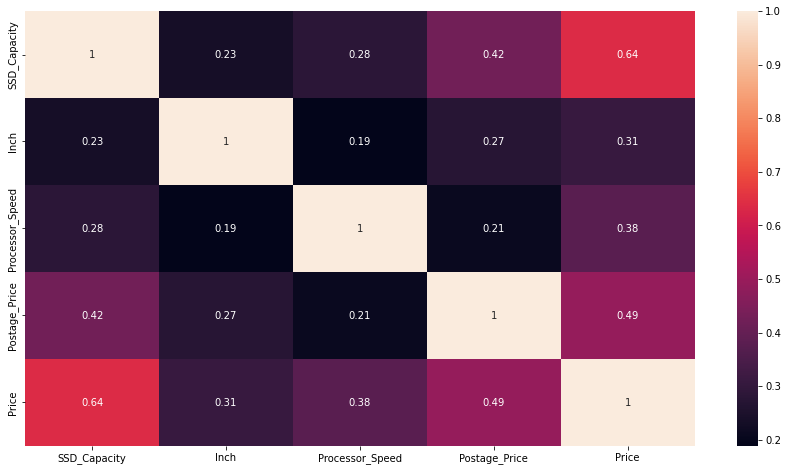

In [124]:
cor_matrix = database.corr()
plt.figure(figsize = (15,8))
sns.heatmap(cor_matrix, annot=True)

** We see some correlation between all the variables in this table. Some of them are more correlated and others less. But of course, there is no negative correlation in the table because all the variables (SSD Capacity, Inch, Processor, Postage Price and Price) in our database work in favor of the quality of the products.

In [127]:
#Fit the linear regression module

rating_model_1 = sm.OLS.from_formula(
"Price ~ Postage_Price + Processor_Speed + Inch + SSD_Capacity", data = database).fit()
rating_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                     54.39
Date:                Sat, 08 Oct 2022   Prob (F-statistic):           2.06e-31
Time:                        12:44:11   Log-Likelihood:                -1405.3
No. Observations:                 215   AIC:                             2821.
Df Residuals:                     210   BIC:                             2838.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        -424.9309    110.766     -3.836      0.000    -643.286    -206.576
Postage_Price       5.7892      1.381      4.192      0.000       3.067       8.512
Processor_Speed    69.8913     19.847      3.521      0.001      30.766     109.016
Inch               16.4417      8.063      2.039      0.043       0.548      32.336
SSD_Capacity        0.5124      0.061      8.446      0.000       0.393       0.632
==============================================================================
Omnibus:                      166.887   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3857.099
Skew:                           2.665   Prob(JB):                         0.00
Kurtosis:                      23.053   Cond. No.                     3.38e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.38e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

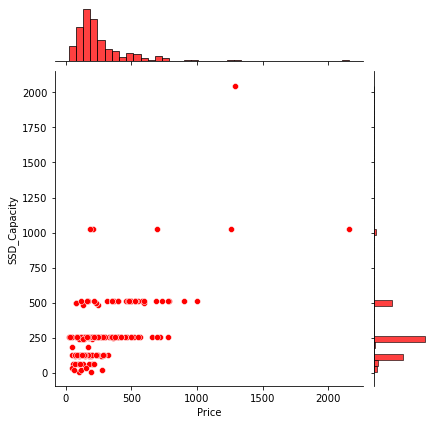

In [128]:
# More time on site, more money spent.
sns.jointplot(x='Price',y='SSD_Capacity',data=database, color='red')

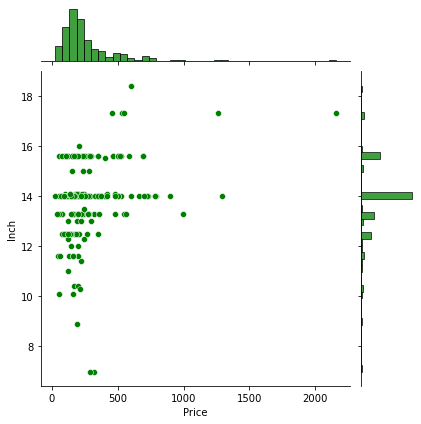

In [129]:
sns.jointplot(x='Price',y='Inch',data=database, color='green')

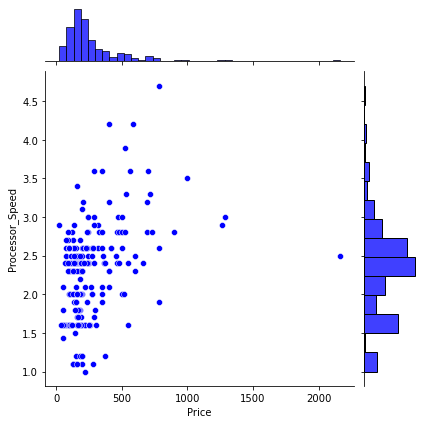

In [131]:
sns.jointplot(x='Price',y='Processor_Speed',data=database, color='blue')

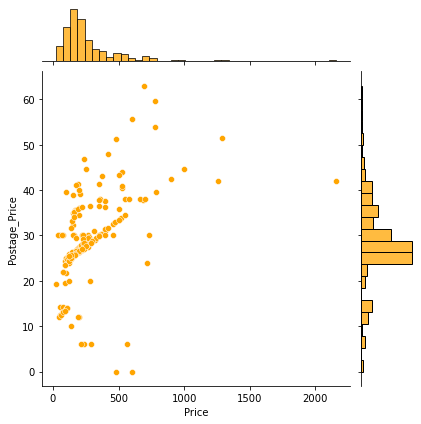

In [132]:
sns.jointplot(x='Price',y='Postage_Price',data=database, color='orange')

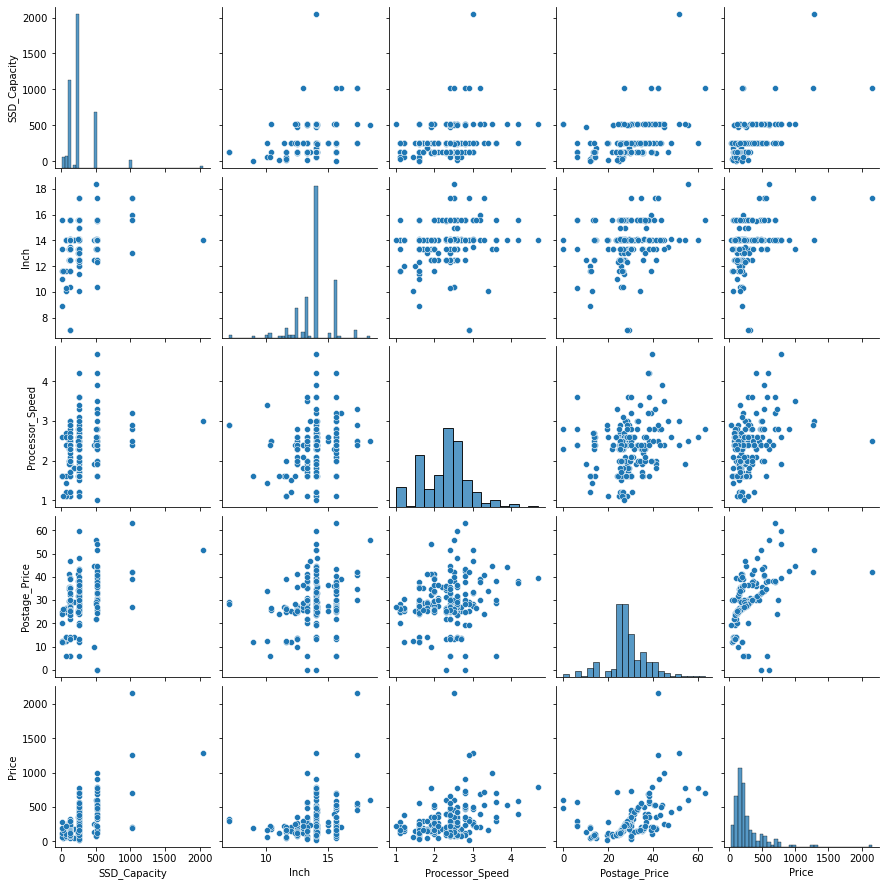

In [133]:
sns.pairplot(database)

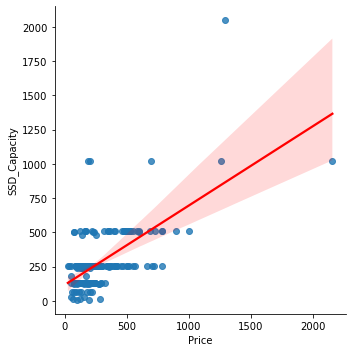

In [134]:
sns.lmplot(x='Price',y='SSD_Capacity',data=database, line_kws={'color': 'red'})

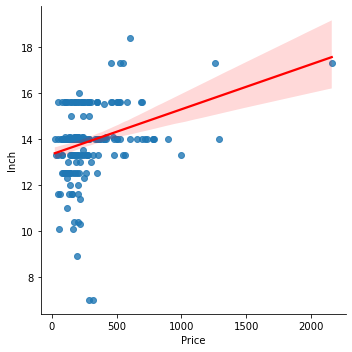

In [135]:
sns.lmplot(x='Price',y='Inch',data=database, line_kws={'color': 'red'})

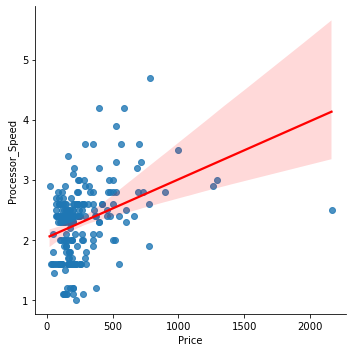

In [136]:
sns.lmplot(x='Price',y='Processor_Speed',data=database, line_kws={'color': 'red'})

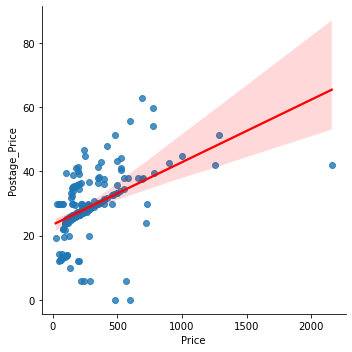

In [137]:
sns.lmplot(x='Price',y='Postage_Price',data=database, line_kws={'color': 'red'})